## Practice Project - Matplotlib based Data Visualization in Python
- #### Heat Maps using Matplotlib 
- #### Confusion Matrix using Matplotlib

### Table of Contents<br>
    Problem statement
    1. Heat Maps using Matplotlib
    2. Confusion Matrix using Matplotlib

### Problem Statement:
``` Using Matplotlib generate Heat Map & Confusion Matrix```<br>

## 1. Heat Maps using Matplotlib

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


Populating the interactive namespace from numpy and matplotlib

In [2]:
helix = pd.read_csv('data/helix_parameters.csv')
helix.head() # just seeing that data was imported properly by outputing first 5 cells

,job_n,Energy,n_helices,r0_A,r0_B,r0_C,omega0,delta_omega0_A,delta_omega0_B,delta_omega0_C,...,invert_B,invert_C,z1_offset_A,z1_offset_B,z1_offset_C,delta_t_A,delta_t_B,delta_t_C,omega1,z1
0,36019,-387.167,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,-3.0,0,0,0,99.999268,1.51
1,36022,-402.606,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,0.6,0,0,0,99.999268,1.51
2,36020,-395.944,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,0.6,-1.8,0,0,0,99.999268,1.51
3,36002,-389.788,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,-3.0,-1.8,0,0,0,99.999268,1.51
4,36005,-388.016,3,6.0,6.0,6.0,0,0,120,240,...,1,0,0,-3.0,1.8,0,0,0,99.999268,1.51


In [3]:
# shape of the dataframe
helix.shape

(47475, 27)

In [4]:
# checking what the columns are
helix.columns

Index(['job_n', 'Energy', 'n_helices', 'r0_A', 'r0_B', 'r0_C', 'omega0',
       'delta_omega0_A', 'delta_omega0_B', 'delta_omega0_C', 'z0_offset_A',
       'z0_offset_B', 'z0_offset_C', 'helix1 phase', 'helix 2 phase',
       'helix3 phase', 'invert_A', 'invert_B', 'invert_C', 'z1_offset_A',
       'z1_offset_B', 'z1_offset_C', 'delta_t_A', 'delta_t_B', 'delta_t_C',
       'omega1', 'z1'],
      dtype='object')

Selecting Columns (by different methods)

In [5]:
# selecting a couple columns
couple_columns = helix[['Energy','helix 2 phase', 'helix1 phase']]
couple_columns.head()

,Energy,helix 2 phase,helix1 phase
0,-387.167,0,0
1,-402.606,0,0
2,-395.944,0,0
3,-389.788,0,0
4,-388.016,0,0


## Heat Map Generation

In [8]:
# this is essentially would be taking the average of each unique combination. 
# one important mention is notice how little the data varies from eachother.
phase_1_2 = couple_columns.groupby(['helix1 phase', 'helix 2 phase']).mean()
print (phase_1_2.shape)
phase_1_2.head(10)

(100, 1)


Energy
helix1 phase helix 2 phase            
0            0             -392.419841
             20            -389.622691
             40            -390.318620
             60            -392.198537
             80            -393.661624
             100           -392.226253
             120           -390.955112
             140           -394.319969
             160           -392.594862
             180           -389.254009

In [9]:
phase_1_2 = phase_1_2.reset_index()
phase_1_2.head()

,helix1 phase,helix 2 phase,Energy
0,0,0,-392.419841
1,0,20,-389.622691
2,0,40,-390.318620
3,0,60,-392.198537
4,0,80,-393.661624


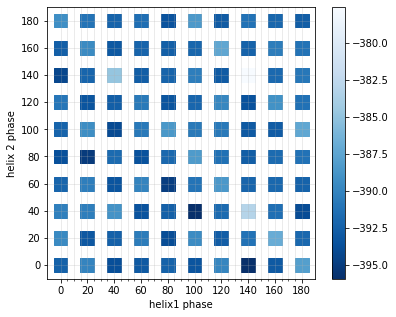

In [10]:
major_ticks = np.arange(0, 200, 20)                                              
minor_ticks = np.arange(0, 180, 5)  

fig = plt.figure(figsize = (6,5))  
ax = fig.add_subplot(1,1,1) 
s = ax.scatter('helix1 phase', 'helix 2 phase', c = 'Energy',data = phase_1_2, cmap = 'Blues_r', marker = 's',s = 190)
ax.axis([phase_1_2['helix1 phase'].min()-10, phase_1_2['helix1 phase'].max()+10, phase_1_2['helix 2 phase'].min()-10, phase_1_2['helix 2 phase'].max()+10])
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)                                           
ax.set_yticks(major_ticks)                                                                                                                                                      
ax.grid(which='both', alpha = 0.3)                                                                                                           
ax.grid(which='major', alpha=0.3) 
ax.set_xlabel('helix1 phase', fontsize=10);
ax.set_ylabel('helix 2 phase', fontsize=10);

# http://stackoverflow.com/questions/13943217/how-to-add-colorbars-to-scatterplots-created-like-this
cbar = plt.colorbar(mappable = s,ax = ax)

plt.show()

<hr>

## 2. Confusion Matrix using Matplotlib

Let's import all the dependencies first.

In [11]:
# primary data structure library
import pandas as pd

# primary plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# using the inline backend
%matplotlib inline 

Now we'll create the DataFrame.

In [12]:
data = {'Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'Predicted': [1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
        }
df = pd.DataFrame(data, columns=['Actual','Predicted'])

Let's plot the confusion matrix.

In [13]:
confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])

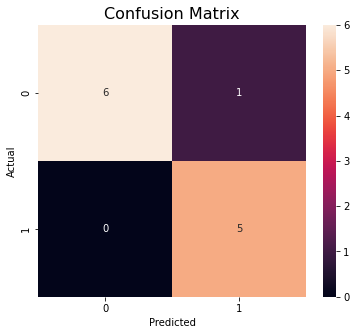

In [14]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion Matrix", fontsize=16)
plt.show()

Didn't like the color theme? you can change it as shown below.

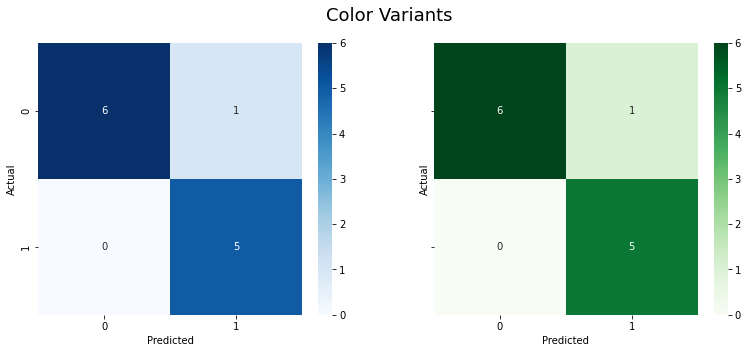

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
fig.suptitle("Color Variants", fontsize=18)
sns.heatmap(confusion_matrix, annot=True, ax=axes[0], cmap="Blues")
sns.heatmap(confusion_matrix, annot=True, ax=axes[1], cmap="Greens")
plt.show()

<hr>